# Finding Heavy Traffic Indicators on I-94

In [2]:
# import pandas and matplotlib packges with appropriate aliases
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data and assign it to a variable
interstate_t = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
# first five rows
interstate_t.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# last fiive rows 
interstate_t.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
# display information about the dataset
interstate_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 9 columns and 48204 entries (rows). The dataset has no null values and is recorded from 2012-10-02, 09:00 to 2018-09-30, 23:00. 

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalising our results for the entire I-94 highway.

## Analysing Traffic Volume

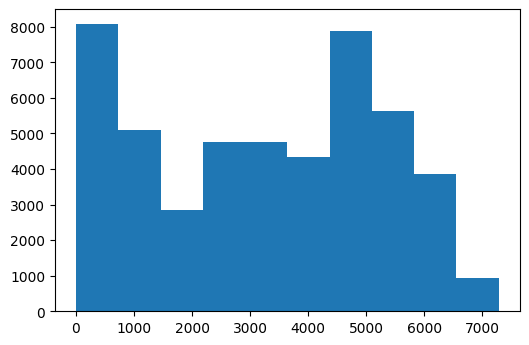

In [6]:
# plot histogram for traffic volume column
plt.hist(interstate_t['traffic_volume'])
plt.show()

In [7]:
# describe traffic volume column
interstate_t['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In the entire time frame from 2012-10-02, 09:00:00 to 2018-09-30, 23:00:00 the traffic volume has ranged from 0 to 7280 cars with an average of 3260 cars. At 25% of the time 1193 cars or fewer were passing the station each hour - most probably at night or when a road is under construction. On the other hand, 75% of the time about 4933 cars are passing the station each hour, which is about four times as much. In the next section the influence of the time of day on traffic volume shall be looked into.

## Traffic Volume: Day vs. Night

The possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime and nighttime data.

We shall start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [8]:
interstate_t['date_time'] = pd.to_datetime(interstate_t['date_time'])

day = interstate_t.copy()[(interstate_t['date_time'].dt.hour >= 7) &
                          (interstate_t['date_time'].dt.hour < 19)
                         ]
print(day.shape)

night = interstate_t.copy()[(interstate_t['date_time'].dt.hour >= 19) |
                            (interstate_t['date_time'].dt.hour < 7)
                           ]
print(night.shape)

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II)

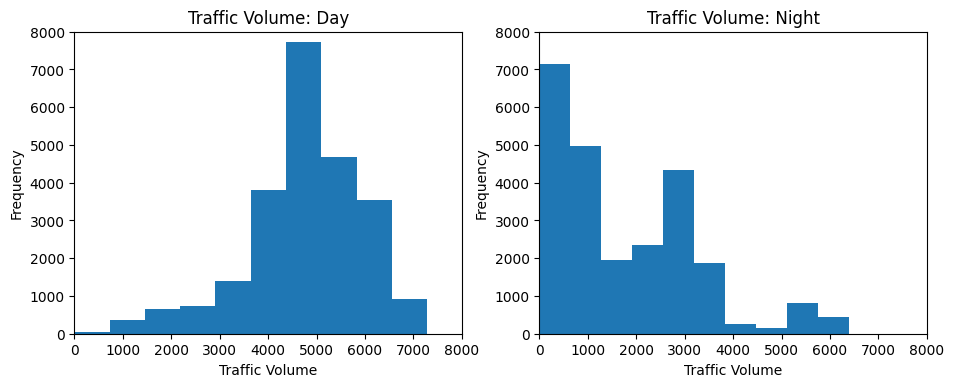

In [9]:
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram showing traffic volume at daytime is left skewed, i.e. most of the values are high with 4,252 or more cars passing at each hour (because 25% of the values are less than 4,252).

The histogram showing traffic volume at night is right skewed, i.e. most of the values are low with 2,819 cars or less passing every hour 75% of the time. There are measurements of 5,000 cars passing every hour, but traffic at night is mostly light.

As our aim is to find heavy traffic indicators, we shall be focusing our attention on daytime traffic.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day,  or at a certain time of the day.

We're going to look at a few plots showing how the traffic volume changed according to the following parmeters:

- Month
- Day of the week
- Time of day

In [12]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

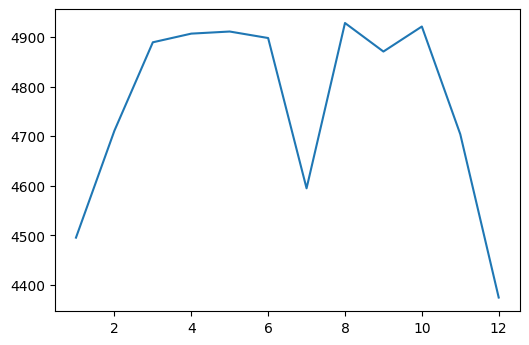

In [13]:
plt.plot(by_month['traffic_volume'])
plt.show()

The average traffic volume starts increasing from the 4500 cars per hour level at the beginning of the year and stays at the 4900 cars per hour level thrughout March, April, May and June, after which it sees a a decline in the month of July to 4600 cars per hour and an immediate rise in the month of August to the highest point in the plot above the 4900 mark. Further, a slight decline can be seen in the month of September and a slight incline in the month of October with all values hovering around the 4900 mark. Post October, a sharp decline is seen all through November, with the month of December seeing the lowest 4400 cars per hour level mark on the plot. 

The information above shows heavy traffic in the warm months and less heavy traffic in the cold months, though in the warm months it shows an exception with less heavy traffic in the month of July. We shall examine further the month of July in particular.

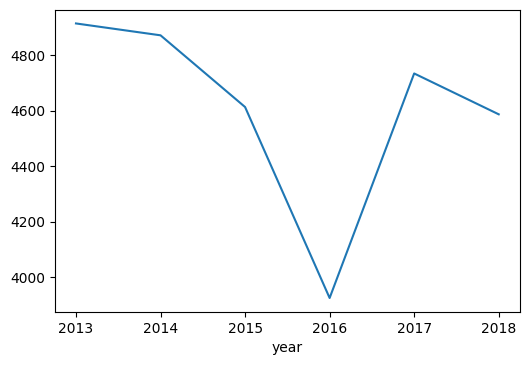

In [14]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Traffic volume in the month of July is pretty high with the exception of 2016, possibly due to road construction work. Here is an [article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) to support our hypothesis. Generally, the traffic volume is seen to be high during the warm months and low during the cold months. We shall now continue with buiding line plots for another time unit: day of the week.

## Time Indicators (II)

In [15]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

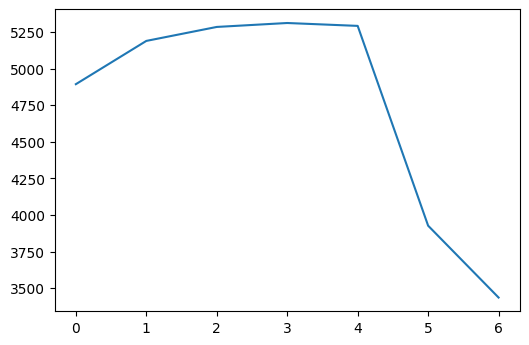

In [16]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

Traffic from Monday to Friday is pretty high, hovering around the 5,000 to 5,250 cars per our range thrughout an sees a steep fall post Friday to below the 4,000 cars per hour level on Saturday and falls even further to the 3,500 level on Sunday. So basically, traffic is high on business days and low on the weekend.

## Time Indicators (III)

In [17]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


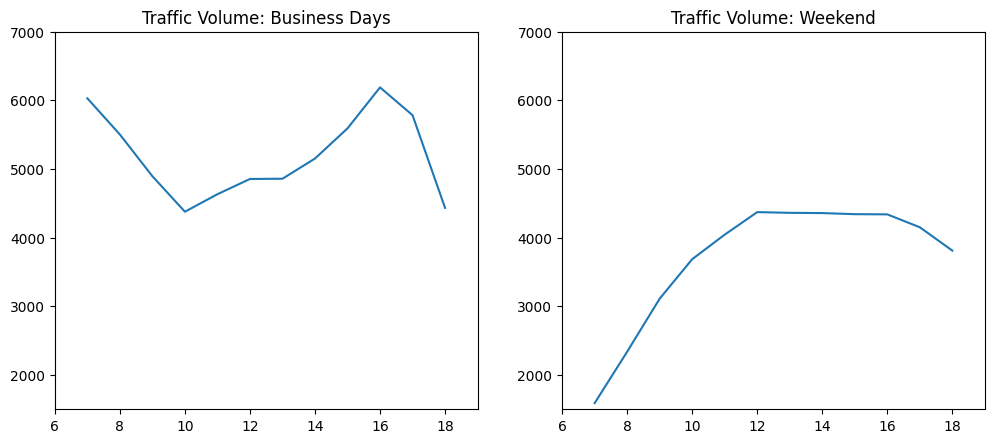

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume: Business Days')
plt.xlim(6, 19)
plt.ylim(1500, 7000)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume: Weekend')
plt.xlim(6, 19)
plt.ylim(1500, 7000)
plt.show()

For every hour the traffic is heavier on business days than it is on weekends, with over 6,000 cars passing at the rush hours of 7 and 16.

To summarise, we've found out that:
- Traffic is heavier during the warm months (March-October) than it is in cold months (November-February).
- Traffic is heavier during business days than it is on weekends.
- Traffic is heavier during the rush hours of 7 and 16 than it is during the rest of the day.

## Weather Indicators

In [19]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

`temp` shows the highest correlation to `traffic_volume` of +0.13. The other relevant columns `rain_1h`, `snow_1h` and `clouds_all` don't show significant correlation with `traffic_volume`. We shall plot `traffic_volume` with `temp` on a scatter plot.

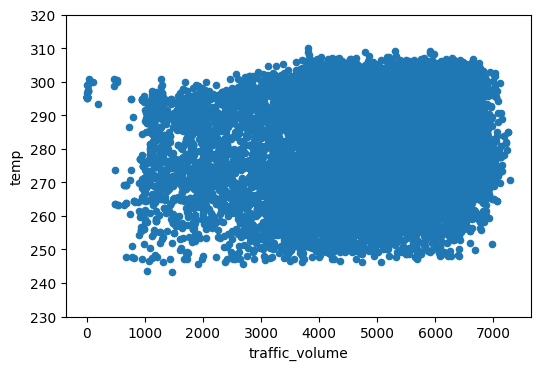

In [24]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two 0k temperatures mess up with the y-axis
plt.show()

From the above graph, temperature doesn't really look like a solid indicator of traffic volume. To see if we can find more useful data, we shall now look into the `weather_main` and the `weather_description` columns.

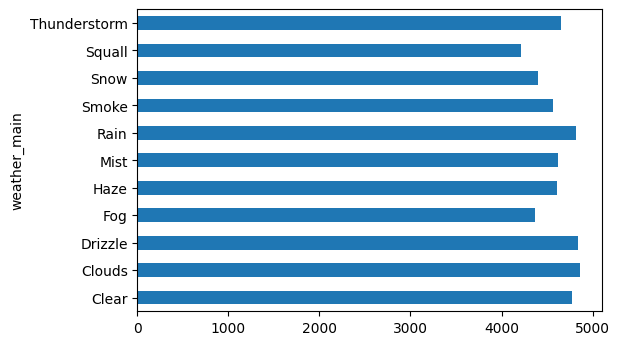

In [26]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.show()

None of the traffic volumes exceed 5,000 cars, hence none of the weather types can be conclusicvely affecting heavy traffic. This makes our analysis more difficult. We shall now examine the weather description by  plotting it on a graph against traffic volume.

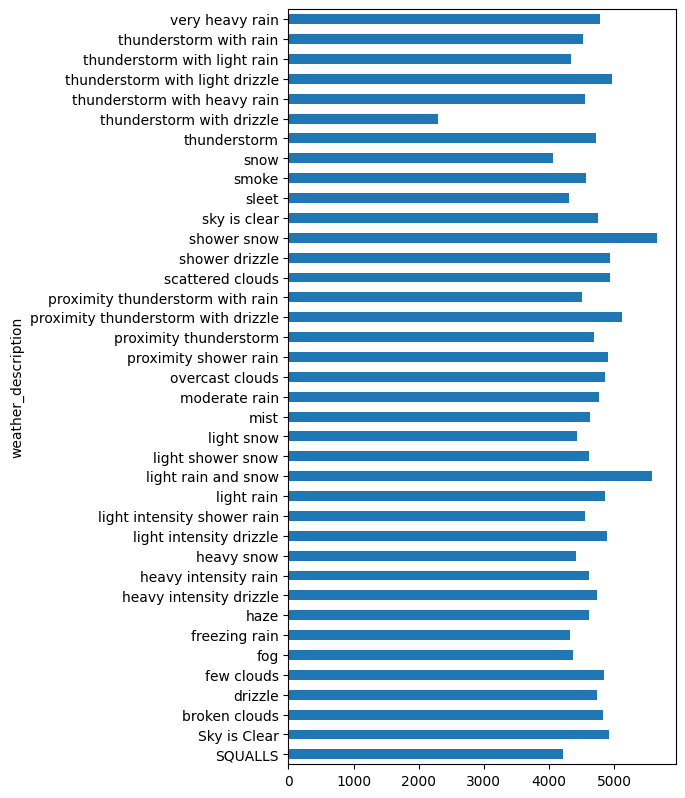

In [33]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

The three weather types from the above charts that show a traffic volume of 5,000 are, i.e. they are indicative of heavy traffic are `light rain and snow`, `proximity thunderstorm with drizzle` and `shower snow`.

## Conclusions

Based on time we can conclude that:
- Traffic is heavier during the warm months (March-October) than it is in cold months (November-February).
- Traffic is heavier during business days than it is on weekends.
- Traffic is heavier during the rush hours of 7 and 16 than it is during the rest of the day.

Based on the weather type we can conclude that the following weather types are indicators of heavy traffic:

- Light Rain and Snow
- Proximity Thunderstorm with Drizzle
- Shower Snow

The above weather types might be causing heavy traffic because of people preferring to use a car instead of a bike, or walking in the above weather cnditions.